In [1]:
import numpy as np
import matplotlib.pylab as plt
from rubin_sim.satellite_constellations import Constellation, starlink_tles_v1, starlink_tles_v2, oneweb_tles

from astropy.coordinates import get_sun, get_moon, EarthLocation, AltAz
from astropy.time import Time
from rubin_sim.utils import Site

In [2]:

mjd0 = 60218.0
# Let's check every 30 minutes
delta = 1./24/2
mjds = np.arange(mjd0, mjd0+365.25+delta, delta)
site = Site("LSST")
location = EarthLocation(lat=site.latitude, lon=site.longitude, height=site.height)
t = Time(mjds, format="mjd", location=location)
sun = get_sun(t)
aa = AltAz(location=location, obstime=t)
sun_aa = sun.transform_to(aa)
sun_down = np.where(sun_aa.alt.deg < -12.)

mjds = mjds[sun_down]

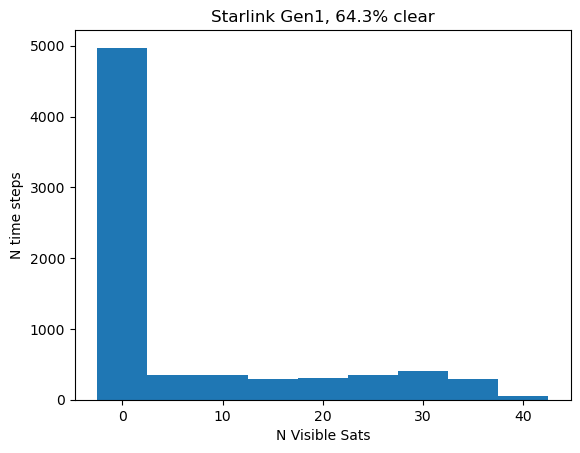

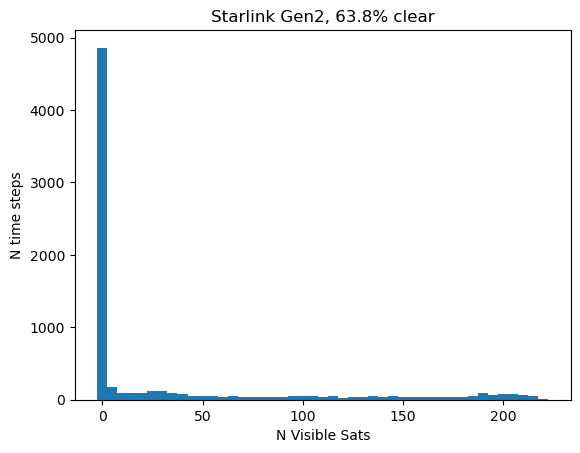

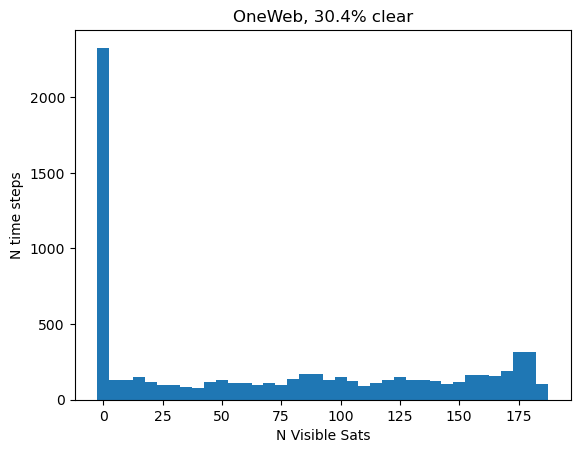

In [3]:
tle_dict = {'Starlink Gen1': starlink_tles_v1(), 'Starlink Gen2': starlink_tles_v2(),
           'OneWeb': oneweb_tles()}

for tles in tle_dict:

    const = Constellation(tle_dict[tles])

    ra,dec,alt,illum = const.paths_array(mjds)
    mask = np.ones(alt.shape)

    mask[np.where(np.degrees(alt) < 20)] = 0
    mask[~illum] = 0
    n_up_illum = np.sum(mask, axis=0)

    fig, ax = plt.subplots()

    ax.hist(n_up_illum, bins=np.arange(0, n_up_illum.max()+5, 5)-2.5)
    ax.set_xlabel('N Visible Sats')
    ax.set_ylabel('N time steps')
    n_clear = np.where(n_up_illum == 0)[0].size
    clear_per = n_clear/n_up_illum.size*100
    ax.set_title('%s, %.1f%% clear' % (tles, clear_per))
